In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3BoaWx0cGF0dG9uL3NvdXJjZS9yZXBvcy9waGlscGF0dG9uLmdpdGh1Yi5pbw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/importlib/_bootstrap.py": 1756909683.181072, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/importlib/_bootstrap_external.py": 1756909683.1840236, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/zipimport.py": 1756909682.1390634, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/codecs.py": 1756909681.7841098, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/aliases.py": 1756909682.4869266, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/__init__.py": 1756909682.467157, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/encodings/utf_8.py": 1756909682.8301048, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/abc.py": 1756909681.751164, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/io.py": 1756909681.8854132, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/stat.py": 1756909682.0489361, "/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/_collections_abc.py": 175

In [2]:
%config InlineBackend.figure_format = 'retina'

from jax import random
from jax.scipy.special import expit
from numpyro.contrib.control_flow import scan
from numpyro.infer import NUTS, MCMC
import arviz as az
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import numpyro
import numpyro.distributions as dist
import seaborn as sns

# plotting defaults
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
sns.set_palette("tab10")

# make the labels on arviz plots nicer
labeller = az.labels.MapLabeller(
    var_name_map={"psi": r"$\psi$", 'gamma':  r"$\gamma$", 'alpha': r'$\alpha$',
                  'epsilon': r"$\epsilon$", 'p':  r"$p$" , 'beta': r'$\beta$',
                  'phi': r'$\phi$', 'alpha_t': r'$\alpha_t$',}
)

# hyperparameters
RANDOM_SEED = 77
MAX_ABUNDANCE = 1000

def augment_history(history):
    # augment data with all zero histories
    number_encounterd, occasion_count = history.shape
    number_to_augment = MAX_ABUNDANCE - number_encounterd
    all_zero_histories = np.zeros((number_to_augment, occasion_count))
    y_augmented = np.vstack([history, all_zero_histories])
    return y_augmented.astype(np.int32)

def load_dipper_data():

    # data
    dipper = np.loadtxt('dipper.csv', delimiter=',').astype(int)
    y_augmented = augment_history(dipper)

    return y_augmented

In [3]:
def js_multistate(capture_history):
    superpopulation_size, occasion_count = capture_history.shape

    # Parameters
    p = numpyro.sample("p", dist.Uniform(0, 1))
    gamma = numpyro.sample("gamma", dist.Uniform(0, 1))

    # N_list = jnp.zeros(occasion_count, dtype=jnp.int32)

    def transition_fn(carry, y_current):

        z_previous, t = carry

        alpha_t = numpyro.sample("alpha_t", dist.Normal(0.0, 2))
        phi_t = expit(alpha_t)

        trans_probs = jnp.array([
            [1 - gamma, gamma, 0.0], # From never-entered
            [0.0, phi_t, 1 - phi_t], # From alive
            [0.0, 0.0, 1.0]          # From dead (absorbing)
        ])

        with numpyro.plate("animals", superpopulation_size, dim=-1):

            first_occasion_probs = jnp.array([1, 0, 0])
            mu_z_current = jnp.where(
                t == 0, first_occasion_probs,
                trans_probs[z_previous]
            )
            z_current = numpyro.sample(
                "state",
                dist.Categorical(dist.util.clamp_probs(mu_z_current)),
                infer={"enumerate": "parallel"}
            )

            mu_y_current = jnp.where(z_current == 1, p, 0.0)
            numpyro.sample(
                "obs",
                dist.Bernoulli(dist.util.clamp_probs(mu_y_current)),
                obs=y_current
            )

            # is_alive = jnp.where(z_current == 1, 1, 0)
            # N_t = jnp.sum(is_alive)
            # N_list.at[t] = N_t

        return (z_current, t + 1), None

    state_init = jnp.zeros(superpopulation_size, dtype=jnp.int32)

    scan(transition_fn, (state_init, 0), jnp.swapaxes(capture_history, 0, 1))

    # qgamma (probability of NOT entering)
    qgamma = 1 - gamma

    # cprob (probability of entering at occasion t)
    cprob = jnp.zeros(occasion_count - 1)
    cprob = cprob.at[0].set(gamma)
    for t in range(1, occasion_count - 1):
        cprob = cprob.at[t].set(gamma * (qgamma ** t))

    # psi (inclusion probability)
    psi = jnp.sum(cprob)

    # b (entry probability conditional on ever entering)
    b = cprob / psi

    # Expected abundance at each occasion
    # This requires forward simulation of state probabilities
    N_expected = jnp.zeros(occasion_count)

    # For a more complete implementation, you'd need to track
    # the probability distribution over states for each individual

    numpyro.deterministic("psi", psi)
    numpyro.deterministic("entry_prob", b)
    numpyro.deterministic("Nsuper_expected", superpopulation_size * psi)

In [4]:
from numpyro.infer.initialization import init_to_median, init_to_feasible
# nuts_kernel = NUTS(js_multistate, init_strategy=init_to_median()) # 11 seconds
# nuts_kernel = NUTS(js_multistate, init_strategy=init_to_feasible()) # 11 second

histories = load_dipper_data()
histories = np.c_[np.zeros(MAX_ABUNDANCE), histories]

rng_key = random.PRNGKey(RANDOM_SEED)

# specify which sampler you want to use
nuts_kernel = NUTS(js_multistate) # 11 seconds

# configure the MCMC run
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=4)

# run the MCMC then inspect the output
mcmc.run(rng_key, histories)
mcmc.print_summary()

/var/folders/7b/nb0vyhy90mdf30_65xwqzl300000gn/T/ipykernel_5397/3968355573.py:14: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=4)


  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   0%|          | 1/1500 [00:01<30:06,  1.21s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|          | 10/1500 [00:01<03:07,  7.95it/s, 319 steps of size 2.93e-02. acc. prob=0.62]

warmup:   1%|          | 16/1500 [00:01<01:52, 13.21it/s, 15 steps of size 1.34e-01. acc. prob=0.71] 

warmup:   1%|▏         | 20/1500 [00:01<01:37, 15.13it/s, 15 steps of size 1.43e-01. acc. prob=0.73]

warmup:   2%|▏         | 24/1500 [00:01<01:20, 18.33it/s, 15 steps of size 1.46e-01. acc. prob=0.74]

warmup:   2%|▏         | 28/1500 [00:02<01:10, 20.96it/s, 63 steps of size 7.86e-02. acc. prob=0.74]

warmup:   2%|▏         | 34/1500 [00:02<01:00, 24.38it/s, 95 steps of size 4.43e-02. acc. prob=0.74]

warmup:   3%|▎         | 38/1500 [00:02<01:06, 21.86it/s, 15 steps of size 1.15e-01. acc. prob=0.75]

warmup:   3%|▎         | 41/1500 [00:02<01:03, 22.97it/s, 15 steps of size 6.62e-02. acc. prob=0.75]

warmup:   3%|▎         | 44/1500 [00:02<01:08, 21.35it/s, 31 steps of size 1.27e-01. acc. prob=0.76]

warmup:   3%|▎         | 49/1500 [00:03<01:17, 18.66it/s, 255 steps of size 3.36e-02. acc. prob=0.75]

warmup:   3%|▎         | 52/1500 [00:03<01:13, 19.74it/s, 15 steps of size 1.33e-01. acc. prob=0.76] 

warmup:   4%|▎         | 55/1500 [00:03<01:18, 18.48it/s, 63 steps of size 6.03e-02. acc. prob=0.76]

warmup:   4%|▍         | 59/1500 [00:03<01:13, 19.62it/s, 127 steps of size 8.50e-02. acc. prob=0.76]

warmup:   4%|▍         | 65/1500 [00:03<00:53, 26.93it/s, 31 steps of size 4.53e-02. acc. prob=0.76] 

warmup:   5%|▍         | 70/1500 [00:03<00:45, 31.29it/s, 15 steps of size 1.11e-01. acc. prob=0.77]

warmup:   5%|▍         | 74/1500 [00:04<00:51, 27.77it/s, 127 steps of size 8.10e-02. acc. prob=0.77]

warmup:   5%|▌         | 78/1500 [00:04<00:52, 27.08it/s, 95 steps of size 5.57e-02. acc. prob=0.77] 

warmup:   5%|▌         | 82/1500 [00:04<00:49, 28.86it/s, 47 steps of size 1.40e-01. acc. prob=0.77]

warmup:   6%|▌         | 86/1500 [00:04<00:49, 28.46it/s, 63 steps of size 5.76e-02. acc. prob=0.77]

warmup:   6%|▌         | 90/1500 [00:04<00:57, 24.51it/s, 63 steps of size 5.78e-02. acc. prob=0.77]

warmup:   6%|▋         | 95/1500 [00:04<00:51, 27.14it/s, 63 steps of size 9.54e-02. acc. prob=0.77]

warmup:   7%|▋         | 98/1500 [00:05<00:59, 23.47it/s, 31 steps of size 1.30e-01. acc. prob=0.78]

warmup:   7%|▋         | 101/1500 [00:05<01:29, 15.70it/s, 127 steps of size 6.50e-01. acc. prob=0.77]

warmup:   8%|▊         | 113/1500 [00:05<00:44, 31.37it/s, 15 steps of size 4.74e-01. acc. prob=0.77] 

warmup:   8%|▊         | 123/1500 [00:05<00:31, 43.39it/s, 15 steps of size 4.86e-01. acc. prob=0.78]

warmup:   9%|▉         | 137/1500 [00:05<00:21, 62.88it/s, 7 steps of size 1.03e+00. acc. prob=0.78] 

warmup:  10%|█         | 151/1500 [00:05<00:16, 79.36it/s, 7 steps of size 6.44e+00. acc. prob=0.78]

warmup:  11%|█         | 163/1500 [00:05<00:15, 87.54it/s, 31 steps of size 2.69e-01. acc. prob=0.78]

warmup:  12%|█▏        | 176/1500 [00:06<00:14, 91.63it/s, 31 steps of size 2.59e-01. acc. prob=0.78]

warmup:  13%|█▎        | 189/1500 [00:06<00:13, 100.03it/s, 7 steps of size 4.49e-01. acc. prob=0.78]

warmup:  14%|█▎        | 203/1500 [00:06<00:11, 110.36it/s, 3 steps of size 1.23e+00. acc. prob=0.78]

warmup:  14%|█▍        | 217/1500 [00:06<00:11, 113.68it/s, 15 steps of size 2.85e-01. acc. prob=0.78]

warmup:  15%|█▌        | 229/1500 [00:06<00:11, 113.35it/s, 3 steps of size 3.07e-01. acc. prob=0.78] 

warmup:  16%|█▌        | 241/1500 [00:06<00:11, 109.80it/s, 7 steps of size 9.42e-01. acc. prob=0.78]

warmup:  17%|█▋        | 255/1500 [00:06<00:10, 116.19it/s, 31 steps of size 1.83e-01. acc. prob=0.78]

warmup:  18%|█▊        | 269/1500 [00:06<00:10, 118.73it/s, 15 steps of size 3.73e-01. acc. prob=0.78]

warmup:  19%|█▉        | 284/1500 [00:06<00:09, 126.09it/s, 15 steps of size 3.49e-01. acc. prob=0.78]

warmup:  20%|█▉        | 297/1500 [00:07<00:09, 125.50it/s, 7 steps of size 8.84e-01. acc. prob=0.78] 

warmup:  21%|██        | 312/1500 [00:07<00:09, 131.97it/s, 7 steps of size 8.84e-01. acc. prob=0.78]

warmup:  22%|██▏       | 329/1500 [00:07<00:08, 140.55it/s, 7 steps of size 7.23e-01. acc. prob=0.78]

warmup:  23%|██▎       | 347/1500 [00:07<00:07, 151.24it/s, 7 steps of size 8.10e-01. acc. prob=0.79]

warmup:  24%|██▍       | 364/1500 [00:07<00:07, 155.69it/s, 3 steps of size 3.54e-01. acc. prob=0.78]

warmup:  25%|██▌       | 380/1500 [00:07<00:07, 150.59it/s, 7 steps of size 5.18e-01. acc. prob=0.79]

warmup:  27%|██▋       | 398/1500 [00:07<00:06, 158.36it/s, 3 steps of size 1.19e+00. acc. prob=0.79]

warmup:  28%|██▊       | 414/1500 [00:07<00:07, 154.04it/s, 3 steps of size 9.62e-01. acc. prob=0.79]

warmup:  29%|██▉       | 432/1500 [00:07<00:06, 160.74it/s, 3 steps of size 9.90e-01. acc. prob=0.79]

warmup:  30%|███       | 450/1500 [00:07<00:06, 163.30it/s, 7 steps of size 8.26e-01. acc. prob=0.79]

warmup:  31%|███       | 467/1500 [00:08<00:06, 159.72it/s, 3 steps of size 1.27e-01. acc. prob=0.79]

warmup:  32%|███▏      | 484/1500 [00:08<00:07, 130.92it/s, 15 steps of size 5.27e-01. acc. prob=0.79]

warmup:  33%|███▎      | 498/1500 [00:08<00:07, 130.51it/s, 7 steps of size 6.70e-01. acc. prob=0.79] 

sample:  34%|███▍      | 513/1500 [00:08<00:07, 134.28it/s, 7 steps of size 6.06e-01. acc. prob=0.85]

sample:  35%|███▌      | 528/1500 [00:08<00:07, 137.22it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  36%|███▌      | 543/1500 [00:08<00:06, 138.04it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  37%|███▋      | 558/1500 [00:08<00:06, 138.48it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  38%|███▊      | 573/1500 [00:08<00:06, 138.79it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  39%|███▉      | 589/1500 [00:09<00:06, 142.11it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  40%|████      | 605/1500 [00:09<00:06, 144.62it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  41%|████▏     | 620/1500 [00:09<00:06, 144.86it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  42%|████▏     | 635/1500 [00:09<00:06, 143.24it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  43%|████▎     | 650/1500 [00:09<00:05, 142.27it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  44%|████▍     | 665/1500 [00:09<00:05, 143.02it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  45%|████▌     | 680/1500 [00:09<00:05, 143.72it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  46%|████▋     | 696/1500 [00:09<00:05, 145.59it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  47%|████▋     | 711/1500 [00:09<00:05, 143.76it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  48%|████▊     | 726/1500 [00:09<00:05, 142.51it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  49%|████▉     | 741/1500 [00:10<00:05, 143.21it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  50%|█████     | 756/1500 [00:10<00:05, 143.83it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  51%|█████▏    | 771/1500 [00:10<00:05, 142.66it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  52%|█████▏    | 786/1500 [00:10<00:04, 143.41it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  53%|█████▎    | 801/1500 [00:10<00:04, 142.27it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  54%|█████▍    | 816/1500 [00:10<00:04, 143.20it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  55%|█████▌    | 831/1500 [00:10<00:04, 142.27it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  56%|█████▋    | 846/1500 [00:10<00:04, 143.01it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  57%|█████▋    | 861/1500 [00:10<00:04, 142.03it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  58%|█████▊    | 876/1500 [00:11<00:04, 142.94it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  59%|█████▉    | 891/1500 [00:11<00:04, 142.14it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  60%|██████    | 906/1500 [00:11<00:04, 143.14it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  61%|██████▏   | 921/1500 [00:11<00:04, 142.01it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  62%|██████▏   | 937/1500 [00:11<00:03, 144.57it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  64%|██████▎   | 953/1500 [00:11<00:03, 146.21it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  65%|██████▍   | 968/1500 [00:11<00:03, 144.29it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  66%|██████▌   | 983/1500 [00:11<00:03, 144.55it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  67%|██████▋   | 998/1500 [00:11<00:03, 143.16it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  68%|██████▊   | 1014/1500 [00:11<00:03, 145.25it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  69%|██████▊   | 1030/1500 [00:12<00:03, 146.66it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  70%|██████▉   | 1046/1500 [00:12<00:03, 147.80it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  71%|███████   | 1061/1500 [00:12<00:02, 147.00it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  72%|███████▏  | 1076/1500 [00:12<00:02, 146.46it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  73%|███████▎  | 1091/1500 [00:12<00:02, 144.32it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  74%|███████▍  | 1107/1500 [00:12<00:02, 146.06it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  75%|███████▍  | 1123/1500 [00:12<00:02, 147.40it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  76%|███████▌  | 1138/1500 [00:12<00:02, 145.04it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  77%|███████▋  | 1153/1500 [00:12<00:02, 143.45it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  78%|███████▊  | 1168/1500 [00:13<00:02, 143.95it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  79%|███████▉  | 1183/1500 [00:13<00:02, 144.48it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  80%|███████▉  | 1198/1500 [00:13<00:02, 143.11it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  81%|████████  | 1213/1500 [00:13<00:02, 143.41it/s, 3 steps of size 6.06e-01. acc. prob=0.89]

sample:  82%|████████▏ | 1228/1500 [00:13<00:01, 142.40it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  83%|████████▎ | 1243/1500 [00:13<00:01, 141.55it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  84%|████████▍ | 1258/1500 [00:13<00:01, 141.19it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  85%|████████▍ | 1273/1500 [00:13<00:01, 142.70it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  86%|████████▌ | 1288/1500 [00:13<00:01, 141.43it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  87%|████████▋ | 1303/1500 [00:13<00:01, 138.85it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  88%|████████▊ | 1318/1500 [00:14<00:01, 141.91it/s, 7 steps of size 6.06e-01. acc. prob=0.89]

sample:  89%|████████▉ | 1333/1500 [00:14<00:01, 141.40it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  90%|████████▉ | 1348/1500 [00:14<00:01, 142.24it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  91%|█████████ | 1363/1500 [00:14<00:00, 142.92it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  92%|█████████▏| 1378/1500 [00:14<00:00, 143.49it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  93%|█████████▎| 1393/1500 [00:14<00:00, 142.44it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  94%|█████████▍| 1409/1500 [00:14<00:00, 144.84it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  95%|█████████▍| 1424/1500 [00:14<00:00, 144.74it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  96%|█████████▌| 1439/1500 [00:14<00:00, 143.20it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  97%|█████████▋| 1455/1500 [00:15<00:00, 145.36it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  98%|█████████▊| 1470/1500 [00:15<00:00, 141.97it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample:  99%|█████████▉| 1485/1500 [00:15<00:00, 142.45it/s, 3 steps of size 6.06e-01. acc. prob=0.90]

sample: 100%|██████████| 1500/1500 [00:15<00:00, 141.20it/s, 7 steps of size 6.06e-01. acc. prob=0.90]

sample: 100%|██████████| 1500/1500 [00:15<00:00, 97.73it/s, 7 steps of size 6.06e-01. acc. prob=0.90] 

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   1%|          | 12/1500 [00:00<00:14, 104.90it/s, 31 steps of size 6.35e-02. acc. prob=0.67]

warmup:   2%|▏         | 23/1500 [00:00<00:50, 28.98it/s, 15 steps of size 9.45e-02. acc. prob=0.73] 

warmup:   2%|▏         | 29/1500 [00:00<00:56, 26.07it/s, 31 steps of size 4.84e-02. acc. prob=0.73]

warmup:   2%|▏         | 33/1500 [00:01<01:01, 23.76it/s, 63 steps of size 2.39e-02. acc. prob=0.73]

warmup:   2%|▏         | 37/1500 [00:01<01:18, 18.63it/s, 47 steps of size 7.28e-02. acc. prob=0.75]

warmup:   3%|▎         | 42/1500 [00:01<01:04, 22.54it/s, 15 steps of size 1.00e-01. acc. prob=0.76]

warmup:   3%|▎         | 46/1500 [00:01<01:03, 22.91it/s, 127 steps of size 6.40e-02. acc. prob=0.75]

warmup:   3%|▎         | 49/1500 [00:01<01:04, 22.38it/s, 5 steps of size 4.34e-02. acc. prob=0.75]  

warmup:   4%|▎         | 53/1500 [00:02<00:57, 24.96it/s, 31 steps of size 4.96e-02. acc. prob=0.76]

warmup:   4%|▎         | 56/1500 [00:02<01:03, 22.68it/s, 31 steps of size 7.77e-02. acc. prob=0.76]

warmup:   4%|▍         | 60/1500 [00:02<01:03, 22.53it/s, 95 steps of size 5.48e-02. acc. prob=0.76]

warmup:   4%|▍         | 63/1500 [00:02<01:02, 22.93it/s, 47 steps of size 4.14e-02. acc. prob=0.76]

warmup:   4%|▍         | 66/1500 [00:02<01:11, 20.05it/s, 63 steps of size 5.07e-02. acc. prob=0.76]

warmup:   5%|▍         | 69/1500 [00:02<01:10, 20.42it/s, 31 steps of size 1.53e-01. acc. prob=0.77]

warmup:   5%|▍         | 72/1500 [00:03<01:09, 20.57it/s, 15 steps of size 8.50e-02. acc. prob=0.77]

warmup:   5%|▌         | 75/1500 [00:03<01:08, 20.83it/s, 31 steps of size 5.25e-02. acc. prob=0.77]

warmup:   5%|▌         | 78/1500 [00:03<01:05, 21.73it/s, 15 steps of size 5.54e-02. acc. prob=0.77]

warmup:   5%|▌         | 82/1500 [00:03<00:54, 25.95it/s, 15 steps of size 8.09e-02. acc. prob=0.77]

warmup:   6%|▌         | 86/1500 [00:03<00:49, 28.49it/s, 31 steps of size 4.18e-02. acc. prob=0.77]

warmup:   6%|▌         | 89/1500 [00:03<00:53, 26.22it/s, 47 steps of size 1.21e-01. acc. prob=0.77]

warmup:   6%|▋         | 95/1500 [00:03<00:41, 34.11it/s, 7 steps of size 2.88e-02. acc. prob=0.77] 

warmup:   7%|▋         | 99/1500 [00:04<00:52, 26.49it/s, 15 steps of size 3.66e-02. acc. prob=0.77]

warmup:   7%|▋         | 103/1500 [00:04<00:51, 27.34it/s, 3 steps of size 1.61e-01. acc. prob=0.77]

warmup:   7%|▋         | 111/1500 [00:04<00:35, 38.68it/s, 7 steps of size 1.30e+00. acc. prob=0.78]

warmup:   8%|▊         | 122/1500 [00:04<00:24, 55.47it/s, 3 steps of size 5.35e-01. acc. prob=0.78]

warmup:   9%|▉         | 133/1500 [00:04<00:20, 67.52it/s, 15 steps of size 3.23e-01. acc. prob=0.78]

warmup:  10%|▉         | 146/1500 [00:04<00:16, 83.64it/s, 7 steps of size 6.70e-01. acc. prob=0.78] 

warmup:  10%|█         | 157/1500 [00:04<00:15, 86.08it/s, 31 steps of size 3.25e-01. acc. prob=0.78]

warmup:  11%|█         | 168/1500 [00:04<00:14, 91.87it/s, 7 steps of size 9.72e-01. acc. prob=0.78] 

warmup:  12%|█▏        | 183/1500 [00:04<00:12, 106.84it/s, 15 steps of size 3.90e-01. acc. prob=0.78]

warmup:  13%|█▎        | 196/1500 [00:05<00:11, 111.73it/s, 15 steps of size 6.85e-01. acc. prob=0.78]

warmup:  14%|█▍        | 210/1500 [00:05<00:10, 119.56it/s, 15 steps of size 4.54e-01. acc. prob=0.78]

warmup:  15%|█▌        | 226/1500 [00:05<00:09, 128.66it/s, 7 steps of size 8.53e-01. acc. prob=0.78] 

warmup:  16%|█▌        | 240/1500 [00:05<00:09, 130.27it/s, 7 steps of size 1.05e+00. acc. prob=0.78]

warmup:  17%|█▋        | 256/1500 [00:05<00:09, 137.19it/s, 7 steps of size 8.69e-01. acc. prob=0.78]

warmup:  18%|█▊        | 270/1500 [00:05<00:09, 125.66it/s, 7 steps of size 5.74e-01. acc. prob=0.78]

warmup:  19%|█▉        | 283/1500 [00:05<00:09, 123.52it/s, 7 steps of size 7.22e-01. acc. prob=0.78]

warmup:  20%|█▉        | 296/1500 [00:05<00:09, 120.98it/s, 7 steps of size 8.82e-01. acc. prob=0.78]

warmup:  21%|██        | 309/1500 [00:05<00:09, 120.50it/s, 7 steps of size 1.23e+00. acc. prob=0.78]

warmup:  22%|██▏       | 326/1500 [00:05<00:08, 133.39it/s, 15 steps of size 4.15e-01. acc. prob=0.78]

warmup:  23%|██▎       | 341/1500 [00:06<00:08, 136.71it/s, 7 steps of size 6.35e-01. acc. prob=0.78] 

warmup:  24%|██▎       | 355/1500 [00:06<00:08, 137.36it/s, 7 steps of size 8.63e-01. acc. prob=0.79]

warmup:  25%|██▍       | 372/1500 [00:06<00:07, 145.96it/s, 7 steps of size 6.91e-01. acc. prob=0.79]

warmup:  26%|██▌       | 389/1500 [00:06<00:07, 150.35it/s, 7 steps of size 6.76e-01. acc. prob=0.79]

warmup:  27%|██▋       | 405/1500 [00:06<00:07, 148.48it/s, 7 steps of size 6.31e-01. acc. prob=0.79]

warmup:  28%|██▊       | 421/1500 [00:06<00:07, 150.64it/s, 7 steps of size 5.65e-01. acc. prob=0.79]

warmup:  29%|██▉       | 437/1500 [00:06<00:07, 150.30it/s, 7 steps of size 8.28e-01. acc. prob=0.79]

warmup:  30%|███       | 454/1500 [00:06<00:06, 155.92it/s, 3 steps of size 8.60e-01. acc. prob=0.79]

warmup:  31%|███▏      | 470/1500 [00:06<00:07, 135.70it/s, 31 steps of size 2.68e-01. acc. prob=0.78]

warmup:  32%|███▏      | 485/1500 [00:07<00:07, 127.59it/s, 7 steps of size 5.28e-01. acc. prob=0.79] 

warmup:  33%|███▎      | 500/1500 [00:07<00:07, 131.95it/s, 7 steps of size 6.02e-01. acc. prob=0.79]

sample:  34%|███▍      | 515/1500 [00:07<00:07, 135.47it/s, 7 steps of size 6.02e-01. acc. prob=0.91]

sample:  35%|███▌      | 530/1500 [00:07<00:07, 138.09it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  36%|███▋      | 546/1500 [00:07<00:06, 143.01it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  37%|███▋      | 561/1500 [00:07<00:06, 141.15it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  38%|███▊      | 576/1500 [00:07<00:06, 140.63it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  39%|███▉      | 591/1500 [00:07<00:06, 140.39it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  40%|████      | 606/1500 [00:07<00:06, 140.03it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  41%|████▏     | 622/1500 [00:08<00:06, 142.94it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  42%|████▏     | 637/1500 [00:08<00:06, 141.98it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  43%|████▎     | 652/1500 [00:08<00:05, 142.97it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  44%|████▍     | 667/1500 [00:08<00:05, 143.65it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  45%|████▌     | 682/1500 [00:08<00:05, 142.38it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  46%|████▋     | 697/1500 [00:08<00:05, 143.11it/s, 7 steps of size 6.02e-01. acc. prob=0.88]

sample:  47%|████▋     | 712/1500 [00:08<00:05, 143.64it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  48%|████▊     | 727/1500 [00:08<00:05, 142.48it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  49%|████▉     | 742/1500 [00:08<00:05, 141.62it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  50%|█████     | 757/1500 [00:09<00:05, 142.60it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  51%|█████▏    | 772/1500 [00:09<00:05, 141.76it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  52%|█████▏    | 787/1500 [00:09<00:05, 140.95it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  53%|█████▎    | 802/1500 [00:09<00:04, 140.53it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  54%|█████▍    | 817/1500 [00:09<00:04, 140.22it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  55%|█████▌    | 832/1500 [00:09<00:04, 140.08it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  56%|█████▋    | 847/1500 [00:09<00:04, 141.59it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  57%|█████▋    | 862/1500 [00:09<00:04, 142.64it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  59%|█████▊    | 878/1500 [00:09<00:04, 145.06it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  60%|█████▉    | 893/1500 [00:09<00:04, 144.81it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  61%|██████    | 908/1500 [00:10<00:04, 143.28it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  62%|██████▏   | 923/1500 [00:10<00:04, 143.76it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  63%|██████▎   | 938/1500 [00:10<00:03, 144.13it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  64%|██████▎   | 953/1500 [00:10<00:03, 144.55it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  65%|██████▍   | 968/1500 [00:10<00:03, 143.01it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  66%|██████▌   | 983/1500 [00:10<00:03, 143.66it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  67%|██████▋   | 998/1500 [00:10<00:03, 144.08it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  68%|██████▊   | 1013/1500 [00:10<00:03, 144.46it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  69%|██████▊   | 1028/1500 [00:10<00:03, 142.88it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  70%|██████▉   | 1043/1500 [00:11<00:03, 141.81it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  71%|███████   | 1059/1500 [00:11<00:03, 144.22it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  72%|███████▏  | 1074/1500 [00:11<00:02, 144.01it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  73%|███████▎  | 1089/1500 [00:11<00:02, 142.70it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  74%|███████▎  | 1104/1500 [00:11<00:02, 141.85it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  75%|███████▍  | 1119/1500 [00:11<00:02, 141.27it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  76%|███████▌  | 1134/1500 [00:11<00:02, 140.80it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  77%|███████▋  | 1149/1500 [00:11<00:02, 140.56it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  78%|███████▊  | 1164/1500 [00:11<00:02, 140.48it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  79%|███████▊  | 1179/1500 [00:11<00:02, 141.65it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  80%|███████▉  | 1195/1500 [00:12<00:02, 144.19it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  81%|████████  | 1211/1500 [00:12<00:01, 145.94it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  82%|████████▏ | 1227/1500 [00:12<00:01, 147.18it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  83%|████████▎ | 1242/1500 [00:12<00:01, 144.68it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  84%|████████▍ | 1257/1500 [00:12<00:01, 142.73it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  85%|████████▍ | 1273/1500 [00:12<00:01, 144.72it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  86%|████████▌ | 1288/1500 [00:12<00:01, 142.35it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  87%|████████▋ | 1303/1500 [00:12<00:01, 143.03it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  88%|████████▊ | 1318/1500 [00:12<00:01, 141.71it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  89%|████████▉ | 1333/1500 [00:13<00:01, 142.45it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  90%|████████▉ | 1349/1500 [00:13<00:01, 146.39it/s, 3 steps of size 6.02e-01. acc. prob=0.89]

sample:  91%|█████████ | 1364/1500 [00:13<00:00, 144.44it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  92%|█████████▏| 1379/1500 [00:13<00:00, 143.06it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  93%|█████████▎| 1395/1500 [00:13<00:00, 144.99it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  94%|█████████▍| 1410/1500 [00:13<00:00, 143.40it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  95%|█████████▌| 1425/1500 [00:13<00:00, 143.91it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  96%|█████████▌| 1440/1500 [00:13<00:00, 144.22it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  97%|█████████▋| 1455/1500 [00:13<00:00, 142.89it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  98%|█████████▊| 1470/1500 [00:13<00:00, 141.76it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample:  99%|█████████▉| 1485/1500 [00:14<00:00, 142.86it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample: 100%|██████████| 1500/1500 [00:14<00:00, 141.76it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

sample: 100%|██████████| 1500/1500 [00:14<00:00, 105.57it/s, 7 steps of size 6.02e-01. acc. prob=0.89]

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   1%|          | 12/1500 [00:00<00:31, 47.13it/s, 159 steps of size 4.34e-02. acc. prob=0.66]

warmup:   1%|          | 17/1500 [00:00<01:36, 15.43it/s, 511 steps of size 2.89e-02. acc. prob=0.69]

warmup:   1%|▏         | 20/1500 [00:01<01:35, 15.58it/s, 63 steps of size 8.63e-02. acc. prob=0.72] 

warmup:   2%|▏         | 24/1500 [00:01<01:32, 15.90it/s, 159 steps of size 6.81e-02. acc. prob=0.73]

warmup:   2%|▏         | 26/1500 [00:01<01:33, 15.74it/s, 7 steps of size 1.39e-02. acc. prob=0.71]  

warmup:   2%|▏         | 28/1500 [00:01<01:33, 15.81it/s, 63 steps of size 4.72e-02. acc. prob=0.73]

warmup:   2%|▏         | 30/1500 [00:01<01:30, 16.32it/s, 47 steps of size 1.49e-01. acc. prob=0.75]

warmup:   2%|▏         | 32/1500 [00:01<01:53, 12.91it/s, 255 steps of size 3.18e-02. acc. prob=0.73]

warmup:   2%|▏         | 34/1500 [00:02<02:20, 10.42it/s, 47 steps of size 6.28e-02. acc. prob=0.74] 

warmup:   3%|▎         | 39/1500 [00:02<01:35, 15.23it/s, 127 steps of size 4.10e-02. acc. prob=0.74]

warmup:   3%|▎         | 41/1500 [00:02<01:47, 13.63it/s, 15 steps of size 8.72e-02. acc. prob=0.75] 

warmup:   3%|▎         | 44/1500 [00:02<01:42, 14.23it/s, 127 steps of size 3.54e-02. acc. prob=0.75]

warmup:   3%|▎         | 46/1500 [00:03<01:44, 13.88it/s, 31 steps of size 8.92e-02. acc. prob=0.76] 

warmup:   3%|▎         | 49/1500 [00:03<01:31, 15.94it/s, 63 steps of size 3.49e-02. acc. prob=0.75]

warmup:   3%|▎         | 51/1500 [00:03<01:58, 12.28it/s, 127 steps of size 7.28e-02. acc. prob=0.76]

warmup:   4%|▎         | 54/1500 [00:03<01:34, 15.34it/s, 79 steps of size 9.19e-02. acc. prob=0.76] 

warmup:   4%|▎         | 56/1500 [00:03<01:38, 14.64it/s, 95 steps of size 9.63e-02. acc. prob=0.76]

warmup:   4%|▍         | 58/1500 [00:03<01:42, 14.12it/s, 31 steps of size 1.12e-01. acc. prob=0.77]

warmup:   4%|▍         | 64/1500 [00:03<01:03, 22.60it/s, 31 steps of size 3.65e-02. acc. prob=0.76]

warmup:   5%|▍         | 68/1500 [00:04<00:55, 26.00it/s, 15 steps of size 1.29e-01. acc. prob=0.77]

warmup:   5%|▍         | 71/1500 [00:04<01:20, 17.66it/s, 127 steps of size 5.97e-02. acc. prob=0.77]

warmup:   5%|▍         | 74/1500 [00:04<01:16, 18.56it/s, 63 steps of size 1.33e-01. acc. prob=0.77] 

warmup:   5%|▌         | 77/1500 [00:04<01:31, 15.56it/s, 79 steps of size 4.22e-02. acc. prob=0.76]

warmup:   5%|▌         | 81/1500 [00:04<01:12, 19.52it/s, 15 steps of size 1.27e-01. acc. prob=0.77]

warmup:   6%|▌         | 84/1500 [00:05<01:13, 19.21it/s, 127 steps of size 6.73e-02. acc. prob=0.77]

warmup:   6%|▌         | 88/1500 [00:05<01:02, 22.74it/s, 31 steps of size 4.96e-02. acc. prob=0.77] 

warmup:   6%|▌         | 93/1500 [00:05<00:49, 28.22it/s, 15 steps of size 4.69e-02. acc. prob=0.77]

warmup:   6%|▋         | 97/1500 [00:05<01:10, 19.76it/s, 127 steps of size 5.85e-02. acc. prob=0.77]

warmup:   7%|▋         | 101/1500 [00:05<01:04, 21.54it/s, 63 steps of size 8.89e-01. acc. prob=0.77]

warmup:   8%|▊         | 113/1500 [00:05<00:34, 39.94it/s, 3 steps of size 1.41e-01. acc. prob=0.77] 

warmup:   8%|▊         | 120/1500 [00:05<00:30, 45.98it/s, 31 steps of size 3.88e-01. acc. prob=0.78]

warmup:   9%|▉         | 132/1500 [00:06<00:21, 62.25it/s, 7 steps of size 1.10e+00. acc. prob=0.78] 

warmup:  10%|▉         | 148/1500 [00:06<00:16, 83.22it/s, 15 steps of size 5.19e-01. acc. prob=0.78]

warmup:  11%|█         | 163/1500 [00:06<00:13, 98.67it/s, 7 steps of size 1.04e+00. acc. prob=0.78] 

warmup:  12%|█▏        | 174/1500 [00:06<00:14, 94.30it/s, 15 steps of size 4.18e-01. acc. prob=0.78]

warmup:  12%|█▏        | 185/1500 [00:06<00:14, 88.79it/s, 7 steps of size 1.14e+00. acc. prob=0.78] 

warmup:  13%|█▎        | 199/1500 [00:06<00:12, 101.52it/s, 3 steps of size 3.53e-01. acc. prob=0.78]

warmup:  14%|█▍        | 212/1500 [00:06<00:12, 105.41it/s, 15 steps of size 6.25e-01. acc. prob=0.78]

warmup:  15%|█▌        | 226/1500 [00:06<00:11, 114.50it/s, 7 steps of size 5.60e-01. acc. prob=0.78] 

warmup:  16%|█▌        | 242/1500 [00:06<00:09, 126.11it/s, 7 steps of size 1.18e+00. acc. prob=0.78]

warmup:  17%|█▋        | 259/1500 [00:07<00:09, 136.83it/s, 7 steps of size 8.10e-01. acc. prob=0.78]

warmup:  18%|█▊        | 273/1500 [00:07<00:09, 125.00it/s, 7 steps of size 8.83e-01. acc. prob=0.78]

warmup:  19%|█▉        | 286/1500 [00:07<00:10, 116.80it/s, 7 steps of size 2.03e-01. acc. prob=0.78]

warmup:  20%|█▉        | 299/1500 [00:07<00:10, 113.58it/s, 3 steps of size 1.90e-01. acc. prob=0.78]

warmup:  21%|██        | 311/1500 [00:07<00:10, 113.27it/s, 7 steps of size 5.29e-01. acc. prob=0.78]

warmup:  22%|██▏       | 325/1500 [00:07<00:09, 120.08it/s, 3 steps of size 1.07e+00. acc. prob=0.78]

warmup:  23%|██▎       | 340/1500 [00:07<00:09, 128.30it/s, 7 steps of size 6.51e-01. acc. prob=0.78]

warmup:  24%|██▎       | 354/1500 [00:07<00:08, 131.12it/s, 15 steps of size 4.69e-01. acc. prob=0.78]

warmup:  25%|██▍       | 369/1500 [00:08<00:08, 132.11it/s, 15 steps of size 3.43e-01. acc. prob=0.78]

warmup:  26%|██▌       | 385/1500 [00:08<00:08, 138.89it/s, 7 steps of size 6.79e-01. acc. prob=0.79] 

warmup:  27%|██▋       | 401/1500 [00:08<00:07, 139.15it/s, 23 steps of size 4.75e-01. acc. prob=0.79]

warmup:  28%|██▊       | 417/1500 [00:08<00:07, 143.84it/s, 3 steps of size 1.00e+00. acc. prob=0.79] 

warmup:  29%|██▉       | 432/1500 [00:08<00:07, 144.16it/s, 7 steps of size 4.74e-01. acc. prob=0.79]

warmup:  30%|██▉       | 447/1500 [00:08<00:07, 136.64it/s, 7 steps of size 5.25e-01. acc. prob=0.79]

warmup:  31%|███       | 461/1500 [00:08<00:08, 128.39it/s, 3 steps of size 1.82e-01. acc. prob=0.78]

warmup:  32%|███▏      | 474/1500 [00:08<00:09, 113.94it/s, 3 steps of size 9.50e-01. acc. prob=0.79]

warmup:  32%|███▏      | 486/1500 [00:08<00:08, 112.69it/s, 7 steps of size 7.15e-01. acc. prob=0.79]

sample:  33%|███▎      | 502/1500 [00:09<00:08, 124.17it/s, 7 steps of size 6.16e-01. acc. prob=0.96]

sample:  34%|███▍      | 517/1500 [00:09<00:07, 129.93it/s, 7 steps of size 6.16e-01. acc. prob=0.89]

sample:  35%|███▌      | 531/1500 [00:09<00:07, 132.63it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  36%|███▋      | 545/1500 [00:09<00:07, 134.66it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  37%|███▋      | 560/1500 [00:09<00:06, 137.71it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  38%|███▊      | 575/1500 [00:09<00:06, 139.92it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  39%|███▉      | 590/1500 [00:09<00:06, 139.99it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  40%|████      | 605/1500 [00:09<00:06, 139.74it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  41%|████▏     | 620/1500 [00:09<00:06, 139.82it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  42%|████▏     | 635/1500 [00:09<00:06, 139.82it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  43%|████▎     | 650/1500 [00:10<00:06, 139.79it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  44%|████▍     | 664/1500 [00:10<00:05, 139.78it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  45%|████▌     | 679/1500 [00:10<00:05, 141.20it/s, 7 steps of size 6.16e-01. acc. prob=0.91]

sample:  46%|████▋     | 695/1500 [00:10<00:05, 143.92it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  47%|████▋     | 711/1500 [00:10<00:05, 145.75it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  48%|████▊     | 726/1500 [00:10<00:05, 143.97it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  49%|████▉     | 741/1500 [00:10<00:05, 142.80it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  50%|█████     | 756/1500 [00:10<00:05, 141.79it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  51%|█████▏    | 771/1500 [00:10<00:05, 142.79it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  52%|█████▏    | 786/1500 [00:11<00:05, 141.98it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  53%|█████▎    | 801/1500 [00:11<00:04, 141.37it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  54%|█████▍    | 816/1500 [00:11<00:04, 142.47it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  55%|█████▌    | 831/1500 [00:11<00:04, 141.59it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  56%|█████▋    | 846/1500 [00:11<00:04, 141.14it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  57%|█████▋    | 861/1500 [00:11<00:04, 142.42it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  58%|█████▊    | 876/1500 [00:11<00:04, 143.30it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  59%|█████▉    | 891/1500 [00:11<00:04, 143.61it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  60%|██████    | 906/1500 [00:11<00:04, 142.35it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  61%|██████▏   | 921/1500 [00:11<00:04, 143.21it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  62%|██████▏   | 936/1500 [00:12<00:03, 142.25it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  63%|██████▎   | 951/1500 [00:12<00:03, 141.44it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  64%|██████▍   | 966/1500 [00:12<00:03, 142.54it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  65%|██████▌   | 982/1500 [00:12<00:03, 146.60it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  66%|██████▋   | 997/1500 [00:12<00:03, 146.16it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  67%|██████▋   | 1012/1500 [00:12<00:03, 144.27it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  68%|██████▊   | 1027/1500 [00:12<00:03, 142.70it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  69%|██████▉   | 1042/1500 [00:12<00:03, 143.03it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  70%|███████   | 1057/1500 [00:12<00:03, 142.10it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  71%|███████▏  | 1072/1500 [00:13<00:03, 141.48it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  72%|███████▏  | 1087/1500 [00:13<00:02, 141.06it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  73%|███████▎  | 1102/1500 [00:13<00:02, 140.53it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  75%|███████▍  | 1118/1500 [00:13<00:02, 143.46it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  76%|███████▌  | 1133/1500 [00:13<00:02, 143.92it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  77%|███████▋  | 1149/1500 [00:13<00:02, 145.76it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  78%|███████▊  | 1164/1500 [00:13<00:02, 145.73it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  79%|███████▊  | 1179/1500 [00:13<00:02, 143.83it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  80%|███████▉  | 1194/1500 [00:13<00:02, 142.54it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  81%|████████  | 1209/1500 [00:13<00:02, 143.45it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  82%|████████▏ | 1224/1500 [00:14<00:01, 142.04it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  83%|████████▎ | 1240/1500 [00:14<00:01, 144.36it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  84%|████████▎ | 1255/1500 [00:14<00:01, 142.80it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  85%|████████▍ | 1271/1500 [00:14<00:01, 146.66it/s, 3 steps of size 6.16e-01. acc. prob=0.90]

sample:  86%|████████▌ | 1286/1500 [00:14<00:01, 143.52it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  87%|████████▋ | 1301/1500 [00:14<00:01, 143.71it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  88%|████████▊ | 1317/1500 [00:14<00:01, 147.19it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  89%|████████▉ | 1332/1500 [00:14<00:01, 144.81it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  90%|████████▉ | 1347/1500 [00:14<00:01, 143.27it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  91%|█████████ | 1362/1500 [00:15<00:00, 143.62it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  92%|█████████▏| 1377/1500 [00:15<00:00, 144.07it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  93%|█████████▎| 1392/1500 [00:15<00:00, 142.56it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  94%|█████████▍| 1407/1500 [00:15<00:00, 141.65it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  95%|█████████▍| 1422/1500 [00:15<00:00, 141.26it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  96%|█████████▌| 1437/1500 [00:15<00:00, 142.52it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  97%|█████████▋| 1452/1500 [00:15<00:00, 141.61it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  98%|█████████▊| 1467/1500 [00:15<00:00, 140.45it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample:  99%|█████████▉| 1482/1500 [00:15<00:00, 141.76it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample: 100%|█████████▉| 1497/1500 [00:16<00:00, 141.26it/s, 7 steps of size 6.16e-01. acc. prob=0.90]

sample: 100%|██████████| 1500/1500 [00:16<00:00, 93.57it/s, 7 steps of size 6.16e-01. acc. prob=0.90] 

  0%|          | 0/1500 [00:00<?, ?it/s]

warmup:   1%|          | 13/1500 [00:00<00:31, 47.55it/s, 191 steps of size 3.34e-02. acc. prob=0.66]

warmup:   1%|          | 18/1500 [00:00<00:43, 34.24it/s, 3 steps of size 1.67e-02. acc. prob=0.68]  

warmup:   2%|▏         | 23/1500 [00:00<00:41, 35.51it/s, 31 steps of size 1.11e-01. acc. prob=0.73]

warmup:   2%|▏         | 27/1500 [00:00<00:40, 35.96it/s, 31 steps of size 7.56e-02. acc. prob=0.74]

warmup:   2%|▏         | 31/1500 [00:00<00:53, 27.66it/s, 159 steps of size 4.14e-02. acc. prob=0.73]

warmup:   2%|▏         | 34/1500 [00:01<00:57, 25.52it/s, 7 steps of size 2.33e-02. acc. prob=0.73]  

warmup:   2%|▏         | 37/1500 [00:01<01:05, 22.25it/s, 63 steps of size 1.23e-01. acc. prob=0.75]

warmup:   3%|▎         | 40/1500 [00:01<01:03, 23.10it/s, 63 steps of size 6.24e-02. acc. prob=0.75]

warmup:   3%|▎         | 43/1500 [00:01<01:06, 21.94it/s, 63 steps of size 1.06e-01. acc. prob=0.76]

warmup:   3%|▎         | 46/1500 [00:01<01:25, 17.09it/s, 127 steps of size 8.47e-02. acc. prob=0.76]

warmup:   3%|▎         | 49/1500 [00:02<01:43, 13.98it/s, 255 steps of size 4.92e-02. acc. prob=0.75]

warmup:   3%|▎         | 51/1500 [00:02<01:43, 14.04it/s, 15 steps of size 1.03e-01. acc. prob=0.76] 

warmup:   4%|▎         | 54/1500 [00:02<01:25, 16.85it/s, 31 steps of size 6.37e-02. acc. prob=0.76]

warmup:   4%|▍         | 58/1500 [00:02<01:12, 19.88it/s, 63 steps of size 4.94e-02. acc. prob=0.76]

warmup:   4%|▍         | 61/1500 [00:02<01:08, 20.94it/s, 63 steps of size 1.08e-01. acc. prob=0.77]

warmup:   4%|▍         | 64/1500 [00:02<01:14, 19.25it/s, 127 steps of size 6.15e-02. acc. prob=0.76]

warmup:   4%|▍         | 67/1500 [00:03<01:14, 19.27it/s, 15 steps of size 3.82e-02. acc. prob=0.76] 

warmup:   5%|▍         | 70/1500 [00:03<01:18, 18.20it/s, 31 steps of size 9.04e-02. acc. prob=0.77]

warmup:   5%|▌         | 76/1500 [00:03<00:54, 26.06it/s, 15 steps of size 7.90e-02. acc. prob=0.77]

warmup:   5%|▌         | 80/1500 [00:03<00:52, 26.85it/s, 63 steps of size 5.54e-02. acc. prob=0.77]

warmup:   6%|▌         | 83/1500 [00:03<01:00, 23.41it/s, 7 steps of size 1.16e-01. acc. prob=0.77] 

warmup:   6%|▌         | 86/1500 [00:03<01:02, 22.53it/s, 15 steps of size 9.29e-02. acc. prob=0.77]

warmup:   6%|▌         | 89/1500 [00:03<00:58, 24.12it/s, 31 steps of size 6.39e-02. acc. prob=0.77]

warmup:   6%|▌         | 92/1500 [00:04<01:01, 22.75it/s, 19 steps of size 3.02e-02. acc. prob=0.77]

warmup:   6%|▋         | 95/1500 [00:04<01:00, 23.17it/s, 31 steps of size 8.25e-02. acc. prob=0.77]

warmup:   7%|▋         | 101/1500 [00:04<00:50, 27.88it/s, 63 steps of size 6.97e-01. acc. prob=0.77]

warmup:   7%|▋         | 111/1500 [00:04<00:31, 44.10it/s, 7 steps of size 7.34e-01. acc. prob=0.77] 

warmup:   8%|▊         | 122/1500 [00:04<00:23, 59.48it/s, 15 steps of size 3.44e-01. acc. prob=0.78]

warmup:   9%|▉         | 135/1500 [00:04<00:17, 77.38it/s, 15 steps of size 4.88e-01. acc. prob=0.78]

warmup:  10%|▉         | 149/1500 [00:04<00:14, 93.97it/s, 7 steps of size 6.78e-01. acc. prob=0.78] 

warmup:  11%|█         | 160/1500 [00:04<00:13, 98.29it/s, 31 steps of size 3.05e-01. acc. prob=0.78]

warmup:  12%|█▏        | 173/1500 [00:04<00:13, 100.31it/s, 31 steps of size 2.40e-01. acc. prob=0.78]

warmup:  12%|█▏        | 186/1500 [00:05<00:12, 105.83it/s, 15 steps of size 2.98e-01. acc. prob=0.78]

warmup:  13%|█▎        | 199/1500 [00:05<00:11, 111.00it/s, 7 steps of size 1.21e+00. acc. prob=0.78] 

warmup:  14%|█▍        | 213/1500 [00:05<00:10, 118.99it/s, 7 steps of size 8.88e-01. acc. prob=0.78]

warmup:  15%|█▌        | 229/1500 [00:05<00:09, 128.28it/s, 7 steps of size 7.61e-01. acc. prob=0.78]

warmup:  16%|█▋        | 245/1500 [00:05<00:09, 134.73it/s, 7 steps of size 6.75e-01. acc. prob=0.78]

warmup:  17%|█▋        | 262/1500 [00:05<00:08, 142.42it/s, 15 steps of size 5.68e-01. acc. prob=0.78]

warmup:  18%|█▊        | 277/1500 [00:05<00:10, 120.28it/s, 7 steps of size 1.01e+00. acc. prob=0.78] 

warmup:  19%|█▉        | 290/1500 [00:05<00:09, 121.18it/s, 3 steps of size 4.07e-01. acc. prob=0.78]

warmup:  20%|██        | 304/1500 [00:05<00:09, 122.21it/s, 15 steps of size 5.01e-01. acc. prob=0.78]

warmup:  21%|██        | 318/1500 [00:06<00:09, 122.94it/s, 15 steps of size 4.11e-01. acc. prob=0.78]

warmup:  22%|██▏       | 331/1500 [00:06<00:10, 114.68it/s, 15 steps of size 6.40e-01. acc. prob=0.78]

warmup:  23%|██▎       | 343/1500 [00:06<00:10, 114.29it/s, 15 steps of size 5.29e-01. acc. prob=0.78]

warmup:  24%|██▍       | 359/1500 [00:06<00:09, 125.60it/s, 7 steps of size 6.09e-01. acc. prob=0.78] 

warmup:  25%|██▌       | 377/1500 [00:06<00:08, 138.59it/s, 7 steps of size 8.43e-01. acc. prob=0.79]

warmup:  26%|██▋       | 394/1500 [00:06<00:07, 146.43it/s, 3 steps of size 8.07e-01. acc. prob=0.79]

warmup:  27%|██▋       | 409/1500 [00:06<00:07, 142.64it/s, 7 steps of size 5.19e-01. acc. prob=0.79]

warmup:  28%|██▊       | 426/1500 [00:06<00:07, 149.37it/s, 7 steps of size 1.00e+00. acc. prob=0.79]

warmup:  30%|██▉       | 443/1500 [00:06<00:06, 152.59it/s, 7 steps of size 9.09e-01. acc. prob=0.79]

warmup:  31%|███       | 459/1500 [00:07<00:07, 147.67it/s, 15 steps of size 4.08e-01. acc. prob=0.79]

warmup:  32%|███▏      | 474/1500 [00:07<00:06, 146.81it/s, 7 steps of size 1.43e+00. acc. prob=0.79] 

warmup:  33%|███▎      | 489/1500 [00:07<00:07, 139.96it/s, 31 steps of size 3.14e-01. acc. prob=0.79]

sample:  34%|███▎      | 504/1500 [00:07<00:07, 136.92it/s, 7 steps of size 5.95e-01. acc. prob=0.92] 

sample:  35%|███▍      | 518/1500 [00:07<00:07, 137.71it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  36%|███▌      | 533/1500 [00:07<00:06, 138.43it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  36%|███▋      | 547/1500 [00:07<00:06, 138.55it/s, 7 steps of size 5.95e-01. acc. prob=0.93]

sample:  37%|███▋      | 561/1500 [00:07<00:06, 138.74it/s, 7 steps of size 5.95e-01. acc. prob=0.93]

sample:  38%|███▊      | 576/1500 [00:07<00:06, 139.09it/s, 7 steps of size 5.95e-01. acc. prob=0.93]

sample:  39%|███▉      | 590/1500 [00:08<00:06, 139.19it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  40%|████      | 605/1500 [00:08<00:06, 139.52it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  41%|████▏     | 619/1500 [00:08<00:06, 139.53it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  42%|████▏     | 633/1500 [00:08<00:06, 139.64it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  43%|████▎     | 648/1500 [00:08<00:06, 139.84it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  44%|████▍     | 663/1500 [00:08<00:05, 141.53it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  45%|████▌     | 678/1500 [00:08<00:05, 142.25it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  46%|████▌     | 693/1500 [00:08<00:05, 141.28it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  47%|████▋     | 708/1500 [00:08<00:05, 140.70it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  48%|████▊     | 723/1500 [00:08<00:05, 140.44it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  49%|████▉     | 738/1500 [00:09<00:05, 140.27it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  50%|█████     | 753/1500 [00:09<00:05, 140.15it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  51%|█████     | 768/1500 [00:09<00:05, 140.08it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  52%|█████▏    | 783/1500 [00:09<00:05, 141.60it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  53%|█████▎    | 798/1500 [00:09<00:04, 142.36it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  54%|█████▍    | 813/1500 [00:09<00:04, 141.59it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  55%|█████▌    | 828/1500 [00:09<00:04, 140.97it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  56%|█████▌    | 843/1500 [00:09<00:04, 142.00it/s, 7 steps of size 5.95e-01. acc. prob=0.92]

sample:  57%|█████▋    | 858/1500 [00:09<00:04, 142.81it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  58%|█████▊    | 873/1500 [00:10<00:04, 141.88it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  59%|█████▉    | 888/1500 [00:10<00:04, 141.35it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  60%|██████    | 903/1500 [00:10<00:04, 142.29it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  61%|██████    | 918/1500 [00:10<00:04, 141.45it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  62%|██████▏   | 933/1500 [00:10<00:04, 140.97it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  63%|██████▎   | 948/1500 [00:10<00:03, 140.75it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  64%|██████▍   | 963/1500 [00:10<00:03, 142.00it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  65%|██████▌   | 978/1500 [00:10<00:03, 142.87it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  66%|██████▌   | 993/1500 [00:10<00:03, 142.01it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  67%|██████▋   | 1008/1500 [00:10<00:03, 141.45it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  68%|██████▊   | 1023/1500 [00:11<00:03, 141.01it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  69%|██████▉   | 1038/1500 [00:11<00:03, 140.65it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  70%|███████   | 1053/1500 [00:11<00:03, 140.30it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  71%|███████   | 1068/1500 [00:11<00:03, 140.08it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  72%|███████▏  | 1084/1500 [00:11<00:02, 143.17it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  73%|███████▎  | 1099/1500 [00:11<00:02, 143.81it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  74%|███████▍  | 1114/1500 [00:11<00:02, 142.37it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  75%|███████▌  | 1130/1500 [00:11<00:02, 144.78it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  76%|███████▋  | 1145/1500 [00:11<00:02, 143.15it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  77%|███████▋  | 1160/1500 [00:12<00:02, 142.22it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  78%|███████▊  | 1175/1500 [00:12<00:02, 141.61it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  79%|███████▉  | 1190/1500 [00:12<00:02, 142.59it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  80%|████████  | 1206/1500 [00:12<00:02, 144.87it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  81%|████████▏ | 1221/1500 [00:12<00:01, 144.99it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  82%|████████▏ | 1237/1500 [00:12<00:01, 148.35it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  83%|████████▎ | 1252/1500 [00:12<00:01, 145.69it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  84%|████████▍ | 1267/1500 [00:12<00:01, 143.78it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  85%|████████▌ | 1282/1500 [00:12<00:01, 142.48it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  86%|████████▋ | 1297/1500 [00:12<00:01, 141.69it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  87%|████████▋ | 1312/1500 [00:13<00:01, 141.12it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  88%|████████▊ | 1327/1500 [00:13<00:01, 140.72it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  89%|████████▉ | 1342/1500 [00:13<00:01, 141.90it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  90%|█████████ | 1357/1500 [00:13<00:01, 141.32it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  91%|█████████▏| 1372/1500 [00:13<00:00, 142.50it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  92%|█████████▏| 1387/1500 [00:13<00:00, 143.45it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  93%|█████████▎| 1402/1500 [00:13<00:00, 143.91it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  94%|█████████▍| 1417/1500 [00:13<00:00, 144.18it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  95%|█████████▌| 1432/1500 [00:13<00:00, 142.80it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  97%|█████████▋| 1448/1500 [00:14<00:00, 146.76it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  98%|█████████▊| 1463/1500 [00:14<00:00, 144.71it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample:  99%|█████████▊| 1478/1500 [00:14<00:00, 143.02it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample: 100%|█████████▉| 1493/1500 [00:14<00:00, 142.08it/s, 7 steps of size 5.95e-01. acc. prob=0.91]

sample: 100%|██████████| 1500/1500 [00:14<00:00, 104.10it/s, 7 steps of size 5.95e-01. acc. prob=0.91]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
alpha_t[0]      0.02      1.97      0.02     -3.15      3.30   7970.38      1.00
alpha_t[1]      0.61      0.51      0.58     -0.17      1.44   6916.48      1.00
alpha_t[2]     -0.14      0.28     -0.14     -0.59      0.33   7592.17      1.00
alpha_t[3]     -0.07      0.23     -0.07     -0.43      0.33   7747.66      1.00
alpha_t[4]      0.53      0.24      0.53      0.12      0.91   8158.59      1.00
alpha_t[5]      0.47      0.23      0.47      0.08      0.82   7698.12      1.00
alpha_t[6]      0.40      0.25      0.40     -0.03      0.79   7319.53      1.00
     gamma      0.05      0.00      0.05      0.05      0.06   6642.79      1.00
         p      0.88      0.03      0.88      0.83      0.94   4810.02      1.00

Number of divergences: 0


/Users/philtpatton/miniforge3/envs/pm/lib/python3.13/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


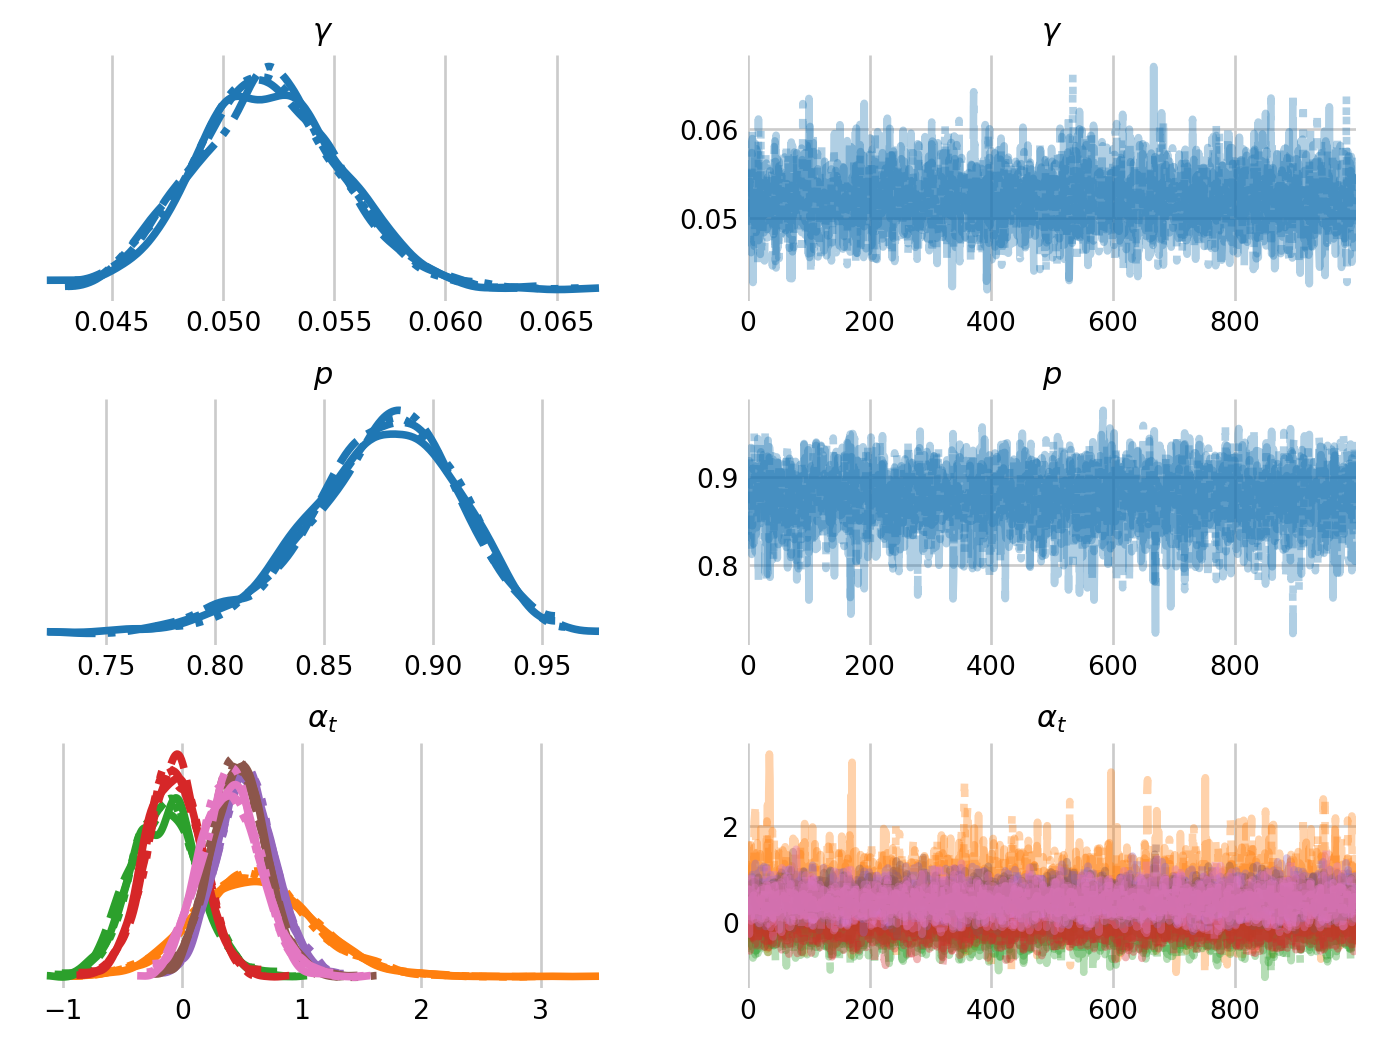

In [5]:
#| fig-cap: Traceplots
#| label: fig

samples = mcmc.get_samples(group_by_chain=True)
idata = az.from_dict(samples)

# skip the first alpha_t because it is uninformative
idata.posterior['alpha_t'] = idata.posterior['alpha_t'][:, :, 1:]
az.plot_trace(idata, figsize=(8,6), var_names=['gamma', 'p', 'alpha_t'],
              labeller=labeller)
plt.subplots_adjust(hspace=0.4)

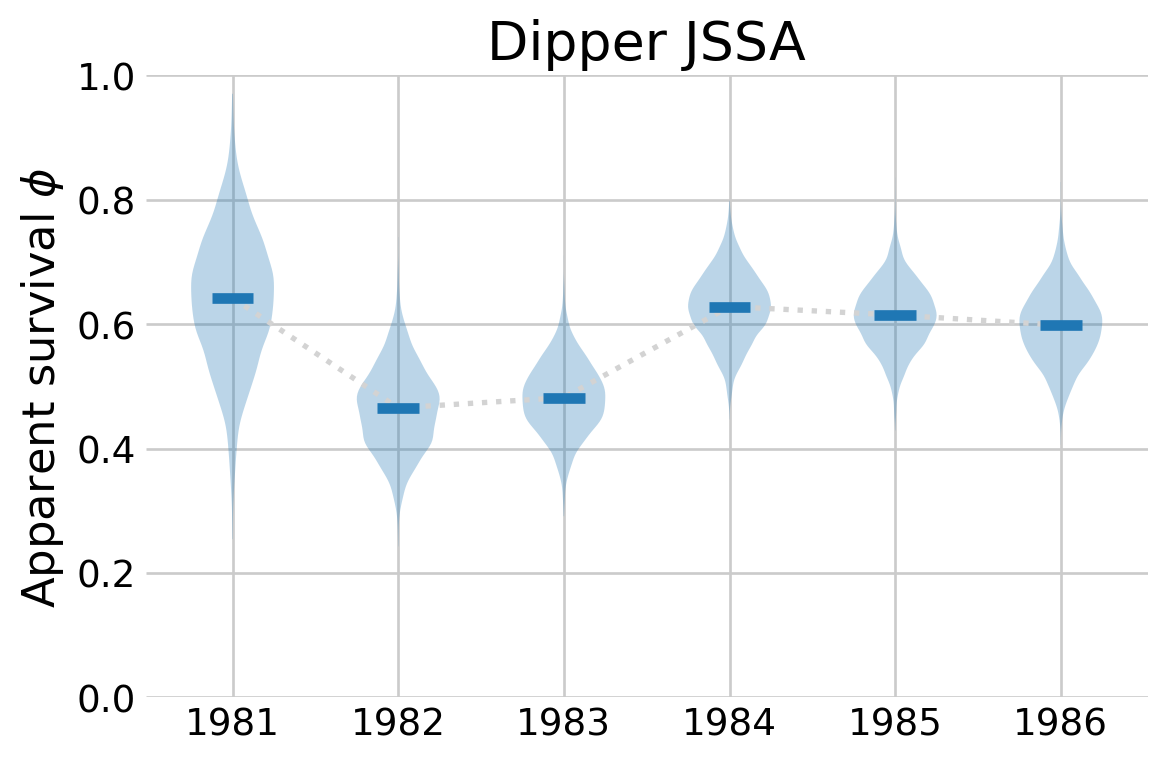

In [6]:
from scipy.special import expit as invlogit

samples = mcmc.get_samples(group_by_chain=False)

fig, ax = plt.subplots(figsize=(6,4))

t = np.arange(1981, 1987)

phi_samples = invlogit(samples['alpha_t'])[:, 1:]
phi_median = np.median(phi_samples, axis=0)

ax.plot(t, phi_median, linestyle='dotted', color='lightgray', linewidth=2)
ax.violinplot(phi_samples, t, showmedians=True, showextrema=False)

ax.set_ylim((0,1))

ax.set_ylabel(r'Apparent survival $\phi$')
ax.set_title(r'Dipper JSSA')

plt.show()